# Quicksort analysis

Quicksort е със средна сложност nlogn, но може да достигне n^2. Неговата сложност зависи от подредбата на входните данни, не само от големината на входа.

Нека фиксираме броя елементи да е 200 хиляди. Ако направим голям брой тестове, където генерираме случайна пермутация и засичаме колко време се извършва сортирането, може да придобием представа колко е вероятно да работи за определено време.

Важно е:
* пермутацията да е наистина равномерно разпределена
* голям брой тестове (в случая 1 милиона)
* да не използваме евристика за намиране на pivot (median of three, например)

In [1]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### Дистрибуция

Долната графика има следното значение. Оста x е време на работа в секунди. Оста y е честота (брой тестове). При фиксирано x, y показва колко от пермутациите са завършили за време x. Така колкото по-нависоко е графиката за някое x, толкова по-вероятно е алгоритъма да приключи за време x.

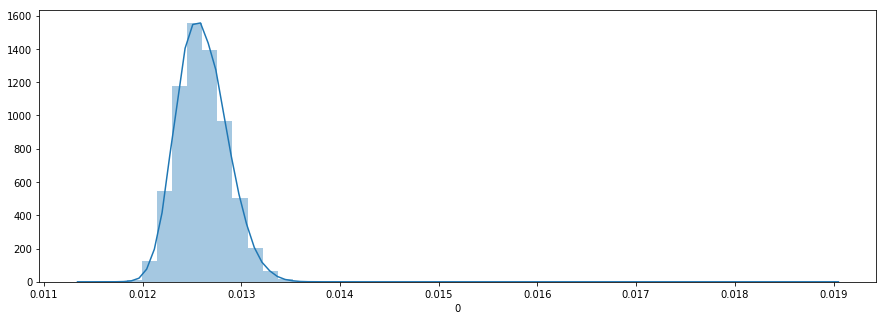

In [2]:
df = pd.read_csv("~/Documents/daa/csv/quicksort.csv", header=None)
series = df.loc[0]

plt.figure (figsize=(15, 5))
sns.distplot(series);

In [3]:
print ("number of runs > 0.0014s:", (series > 0.014).sum())

number of runs > 0.0014s: 22


Вижда се ясно, че програмата **с голяма вероятност** ще завърши за време около *0.0126s*. Когато тръгваме да се отдалечаваме от тази стойност, вероятността намаля много бързо. Тоест при големи n, ако входа наистина е случаен, няма опастност quicksort да работи бавно, напротив -- ще работи доста бързо.

**N.B.** В най-лошия случай отнема около *10.878030* секунди. На оста x няма число, което да е и близо до тази
стойност. Тоест, дори при 1 милион тестове, не успяхме да се доближим дори и малко до най-лошия случай на quicksort. Нека си припомним, че общия брой пермутации е 200'000!. Спрямо това масивно число много малко са неблагоприятни.

Заключение: За малки n разликата в бързите и бавните сортировки не е ясно изразена и няма значение на коя пермутация ще попаднем. За големи n не е реалистично да попаднем на неблагоприятна пермутация.

### Сравнение на бързите сортировки

Нека сравним времето за работа на:
* quicksort с hoar partitioning
* quicksort с lomuto partitioning
* mergesort
* std::sort

In [4]:
df = pd.read_csv("~/Documents/daa/csv/sort.csv")

def plotComplexity(hoar=False, lomuto=False, merge=False, std=False):
    useAlgs=[]
    if hoar:
        useAlgs.append ('hoar')
    if lomuto:
        useAlgs.append ('lomuto')
    if merge:
        useAlgs.append ('merge')
    if std:
        useAlgs.append ('std')
    
    plt.figure (figsize=(15, 8))
    bv = df.alg.apply(lambda x: x in useAlgs)
    sns.scatterplot(x='n', y='secs', hue='alg', data=df[bv]);

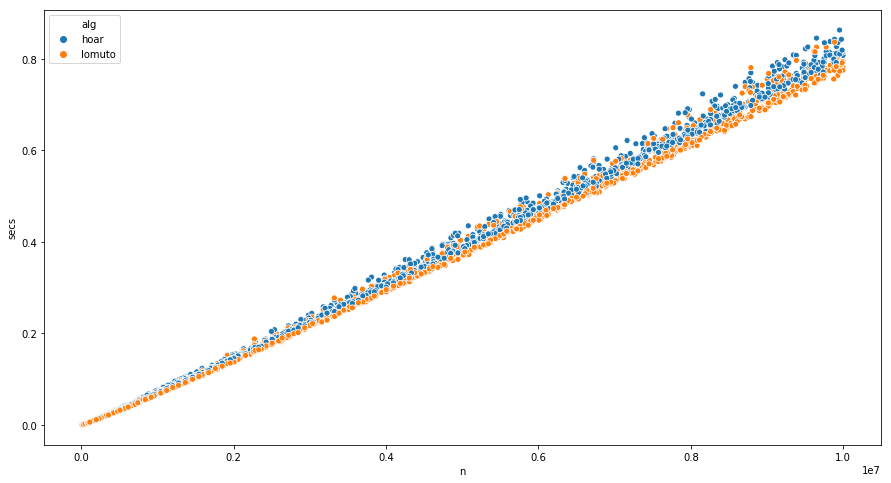

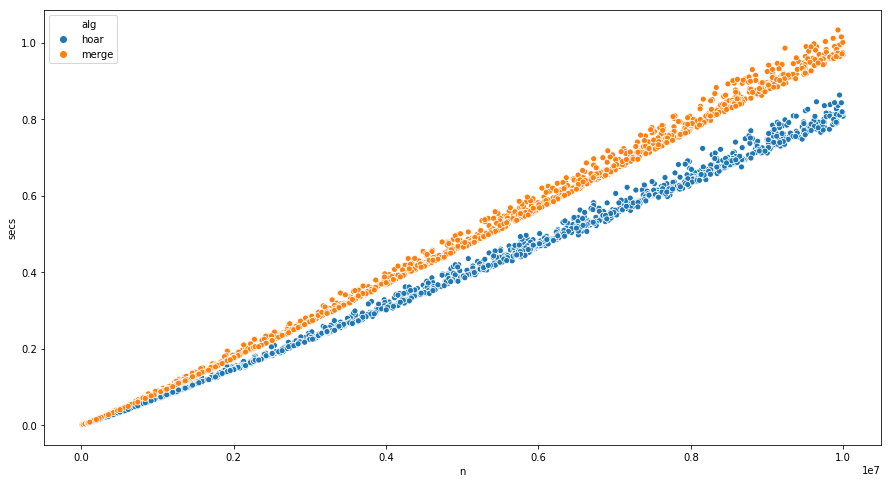

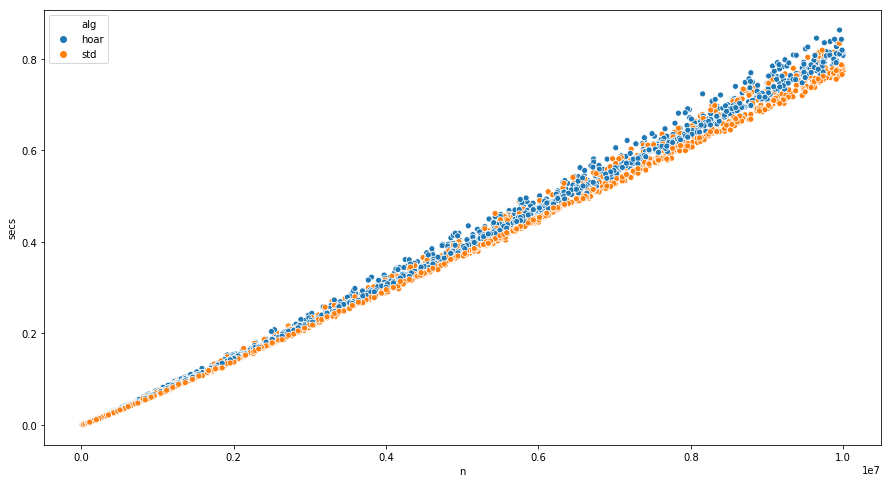

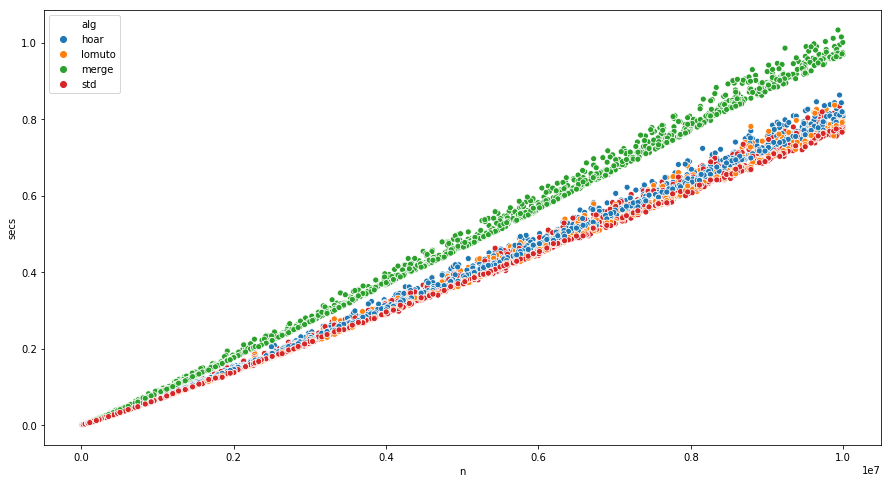

In [5]:
#interact(plotComplexity, hoar=True, lomuto=True, merge=False, std=False);

plotComplexity(hoar=True, lomuto=True)
plotComplexity(hoar=True, merge=True)
plotComplexity(hoar=True, std=True)
plotComplexity(hoar=True, lomuto=True, merge=True, std=True)

От графиката може да заключим, че:
* mergesort работи по-бавно от другите сортировки
* lomuto при тази големина на входа изглежда малко по-бърз *(hoar би трябвало да е по-бързият)*
* прилично близо сме до std::sort, но при по-големи n разликата става осезаема